# K-fold cross-validation

Using scikit-learn

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

from functions import runge

# from sklearn.linear_model import Ridge


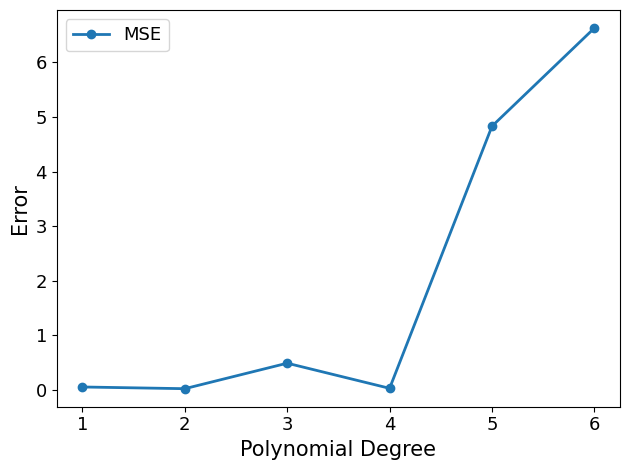

In [25]:
# no of datapoints
n = 1000

# random seed
np.random.seed(42)

# setting x and y
x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

maxdegree = 6
degrees = range(1,maxdegree+1)

# initialising kfolds
k = 5
kfold = KFold(n_splits= k)

scores_kfold = np.zeros((maxdegree,k))


# looping over polynomial degrees
for p in degrees:
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    j = 0 
    for train_inds, test_inds in kfold.split(x):
        x_train = x[train_inds]
        y_train = y[train_inds]

        x_test = x[test_inds]
        y_test = y[test_inds]

        X_train = poly.fit_transform(x_train)
        model = LinearRegression().fit(X_train, y_train)

        X_test = poly.fit_transform(x_test)
        y_pred = model.predict(X_test)
        scores_kfold[p-1,j] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )

estimated_mse_kfold = np.mean(scores_kfold, axis = 1)

# plotting
plt.plot(degrees,estimated_mse_kfold, label='MSE', marker='o', linewidth=2)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.xticks(degrees)
plt.tick_params(axis='both', labelsize=13)
plt.legend(fontsize=13, loc='upper left')
plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("../Figures/kfold_k5.png", dpi=300, bbox_inches='tight')
plt.show()